## This is Just a Simple Kidding Around My Few Knowledge In Data Science

 ------------------------------------------------------------------------------------


In [1]:
#!/bin/bash/python3

# python packages necessary to this analysis also specified in requeriments.txt 
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta
from GoogleNews import GoogleNews
from newspaper import Article

#### IBOV Daily Variation

In [30]:
YEARS_RANGE=3
end_date = date.today().strftime('%m-%d-%Y')
ini_date = (date.today()+timedelta(days=-365*YEARS_RANGE)).strftime('%m-%d-%Y')
bovespa = pdr.DataReader('^BVSP', data_source='yahoo', start=ini_date, end=end_date)
bovespa['Min'] = bovespa['Low'].min()
bovespa['Max'] = bovespa['High'].max()
bovespa['Mean'] = bovespa['Adj Close'].mean()
display(bovespa)

,High,Low,Open,Close,Volume,Adj Close,Min,Max,Mean
Date,,,,,,,,,
2018-05-21,83883.0,81576.0,83095.0,81815.0,4242200.0,81815.0,61691.0,125324.0,97930.471467
2018-05-22,83396.0,81613.0,81817.0,82739.0,4785500.0,82739.0,61691.0,125324.0,97930.471467
2018-05-23,82742.0,80867.0,82742.0,80867.0,3875500.0,80867.0,61691.0,125324.0,97930.471467
2018-05-24,80860.0,79027.0,80860.0,80122.0,6182200.0,80122.0,61691.0,125324.0,97930.471467
2018-05-25,80629.0,78622.0,80123.0,78898.0,4650100.0,78898.0,61691.0,125324.0,97930.471467
...,...,...,...,...,...,...,...,...,...
2021-05-12,122964.0,119458.0,122964.0,119710.0,9405200.0,119710.0,61691.0,125324.0,97930.471467
2021-05-13,121426.0,119711.0,119711.0,120706.0,9356200.0,120706.0,61691.0,125324.0,97930.471467
2021-05-14,122195.0,120719.0,120719.0,121881.0,10136300.0,121881.0,61691.0,125324.0,97930.471467


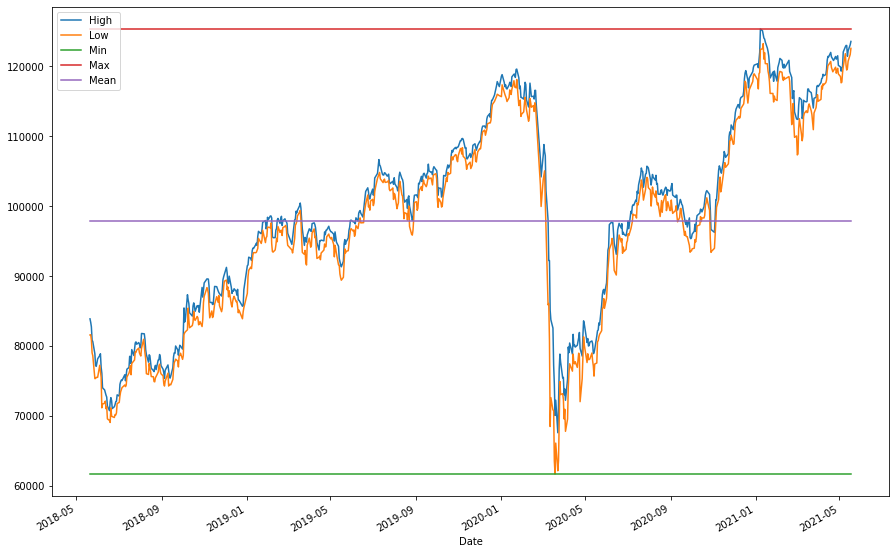

In [31]:
bovespa[['High','Low','Min','Max','Mean']].plot(figsize=(15,10))
plt.show()

#### Stock Variation in Mining Companies

In [4]:
mining_companies = ['AURA33','BRAP3','BRAP4','CMIN3','LTEL3B','LTLA3B','MMXM3','VALE3']
mining_market = pd.DataFrame()
for t in mining_companies:
    try:
        aux = pdr.DataReader(f'{t}.SA',data_source='yahoo',start=ini_date,end=end_date)
        mining_market[t] = aux['Adj Close']
    except:
        pass
display(mining_market)

,AURA33,BRAP3,BRAP4,CMIN3,MMXM3,VALE3
Date,,,,,,
2020-07-06,47.903725,30.489582,33.577320,NaN,1.990000,51.959354
2020-07-07,48.226692,30.489582,33.641788,NaN,1.970000,51.775658
2020-07-08,51.027607,31.013050,34.231186,NaN,1.960000,52.648228
2020-07-09,51.026985,30.755911,33.908859,NaN,1.960000,51.821583
2020-07-10,51.027607,31.472229,34.590355,NaN,1.950000,52.326756
...,...,...,...,...,...,...
2021-05-12,64.300003,64.540001,74.330002,10.04,16.900000,114.330002
2021-05-13,64.269997,62.599998,72.110001,9.87,16.100000,112.489998
2021-05-14,63.799999,61.700001,71.019997,9.54,18.049999,110.559998


#### Bellow just a treatment for NaN values to giving us a market overview

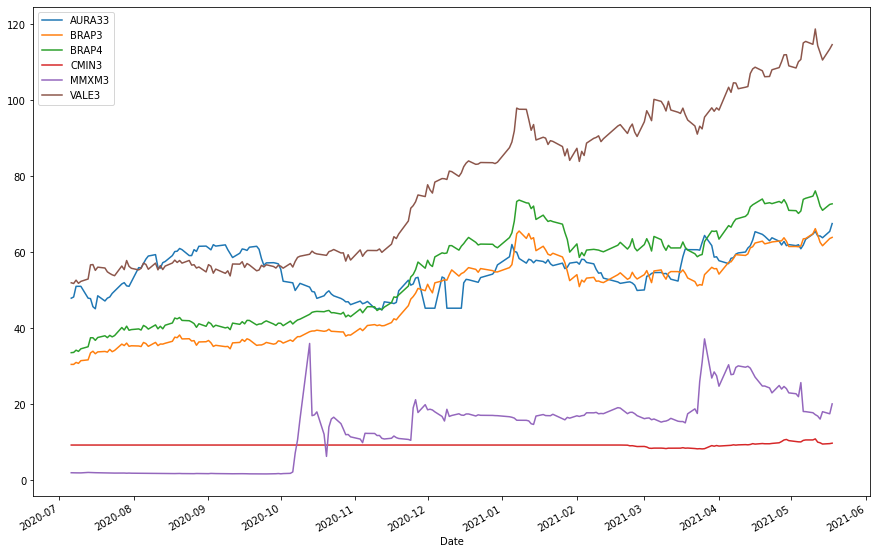

In [5]:
for idx,ticket in enumerate(mining_market):
    mining_market[ticket] = mining_market[ticket].fillna(mining_market[ticket].mean())

mining_market.plot(figsize=(15,10))
plt.show()

--------------------------------------------------------------------------------------------------

#### Here we'll extract the occurrences of volume outlier for contextual ticket


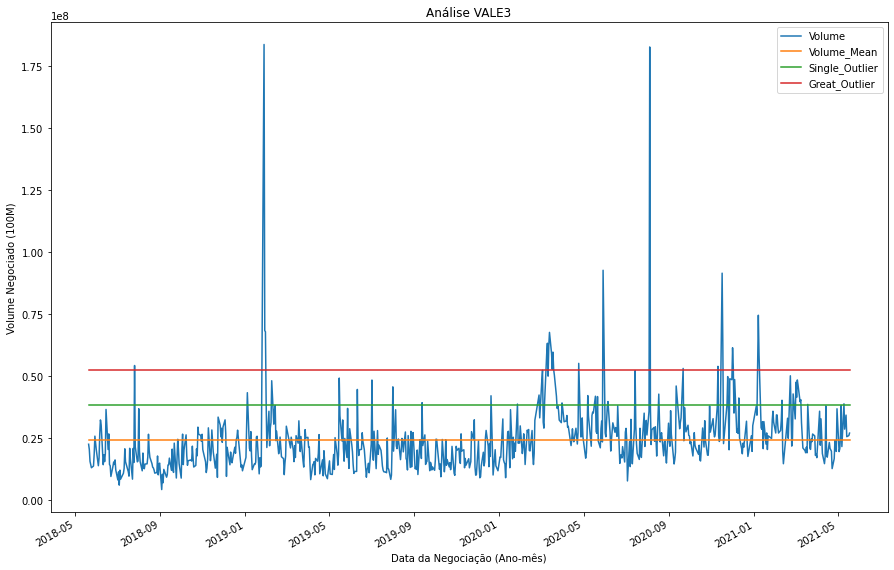

In [6]:
contextual_ticket = 'VALE3'

#loading stock data only for best player market
ticket_data = pdr.DataReader(contextual_ticket+'.SA',data_source='yahoo',start=ini_date,end=end_date)

# including our outlier line defined as the volume mean plus his standard deviation
ticket_data['Volume_Mean'] = ticket_data['Volume'].mean()
ticket_data['Single_Outlier'] = ticket_data['Volume'].mean()+ticket_data['Volume'].std()
ticket_data['Great_Outlier'] = ticket_data['Volume'].mean()+ticket_data['Volume'].std()*2

# ploting graph with labels
graph = ticket_data[['Volume','Volume_Mean','Single_Outlier','Great_Outlier']].plot(figsize=(15,10))
graph.set_xlabel('Data da Negociação (Ano-mês)')
graph.set_ylabel('Volume Negociado (100M)')
graph.set_title('Análise '+contextual_ticket) 
plt.show()

* Note on performance: I don't know exactly what the weight of memory and/or when we will need to think about it, but the number 'Volume_Outiliers' has been included above just to plot on the graph and give us a good view around the outliers that let's fetch below. I you are working with a large and slow dataframe think about save static number in one single variable instead put them repetly in the matrix. 

In [7]:
# just a example of column droping
try:
    ticket_data.drop(labels='Volume_Mean', axis='columns', inplace=True)
    ticket_data.drop(labels='Single_Outlier', axis='columns', inplace=True)
    ticket_data.drop(labels='Great_Outlier', axis='columns', inplace=True)
except:
    pass

# and working with one single variable
volume_outlier = ticket_data['Volume'].mean()+ticket_data['Volume'].std()

# extracting outilier key moments
#volume_outlier_moments = ticket_data.loc[ticket_data['Volume']>great_outlier].copy()
volume_outlier_moments = ticket_data.loc[ticket_data['Volume']>volume_outlier].copy(['Open','Close','Volume'])
print('\nDatas em que ouveram uma variação anormal nas ações da {}:\n\n{}'.format(contextual_ticket,volume_outlier_moments.index))



Datas em que ouveram uma variação anormal nas ações da VALE3:

DatetimeIndex(['2018-07-26', '2019-01-04', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31', '2019-02-08', '2019-05-16',
               '2019-06-11', '2019-07-02', '2019-08-01', '2019-09-12',
               '2019-12-20', '2020-01-27', '2020-02-27', '2020-03-02',
               '2020-03-03', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-31', '2020-04-24', '2020-05-07',
               '2020-05-18', '2020-05-21', '2020-05-29', '2020-06-05',
               '2020-07-14', '2020-08-04', '2020-08-17', '2020-09-11',
               '2020-09-21', '2020-11-10', '2020-11-16', '2020-11-17',
               '2020-11-23', '2020-11-24', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-04', '2020-12-10',
             

#### Bellow we calculate the mean only between of this outliers data, to seek the relevantest dates 

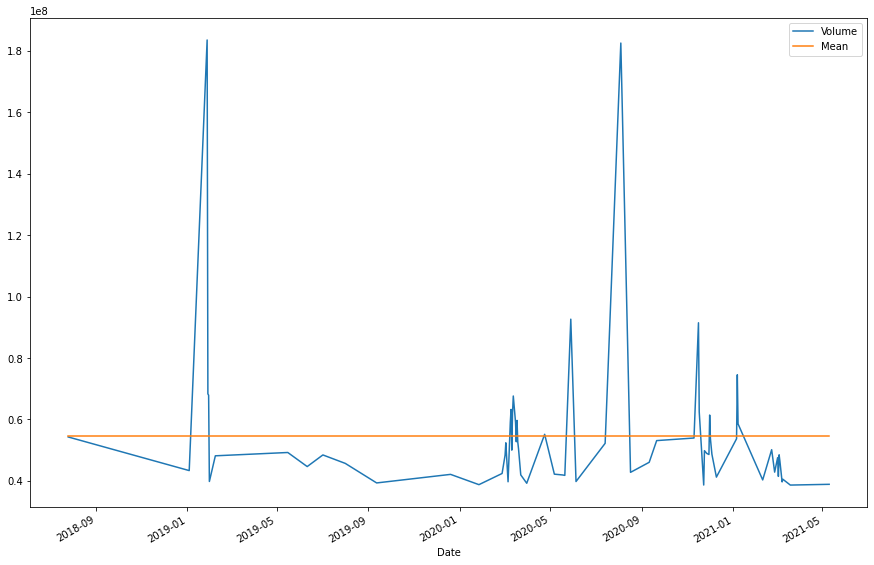

In [8]:
volume_outlier_moments['Mean'] = volume_outlier_moments['Volume'].mean()
volume_outlier_moments[['Volume','Mean']].plot(figsize=(15,10))
plt.show()

In [9]:
relevantest_moments = volume_outlier_moments.loc[volume_outlier_moments['Volume']>volume_outlier_moments['Mean']].copy()

try:
    relevantest_moments.drop(labels='Mean', axis='columns', inplace=True)
except:
    pass

relevantest_moments

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-28,45.000000,42.360001,45.000000,42.360001,183534500.0,37.903149
2019-01-29,44.689999,42.599998,43.270000,42.740002,68335900.0,38.243172
2019-01-30,46.799999,44.980000,46.250000,46.599998,67892500.0,41.697041
2020-03-09,41.540001,37.810001,40.450001,37.830002,59037000.0,34.746731
2020-03-10,45.340000,40.799999,41.900002,44.810001,63269800.0,41.157837
2020-03-12,36.000000,32.450001,36.000000,35.349998,62222000.0,32.468853
2020-03-13,44.029999,37.000000,42.000000,42.900002,67635900.0,39.403507
2020-03-16,41.400002,36.009998,36.009998,39.040001,59078300.0,35.858112
2020-03-18,40.869999,35.700001,38.799999,38.650002,59689100.0,35.499897


#### Now we try to separate this dates with 10 days range between them for search some news in next step 

In [10]:
ini_date, end_date, moments_list,time_event = None,None, [],[]

for idx,series in relevantest_moments.iterrows():
    if ini_date == None and end_date == None: 
        ini_date = idx
        end_date = idx + timedelta(days=10)
        time_event.append(idx)
    else :
        if series.name > end_date :
            moments_list.append(time_event)
            time_event = []
            ini_date = idx
            end_date = idx + timedelta(days=10)
            time_event.append(idx)
        else:
            time_event.append(idx)
            last_series_name = idx

#### Just showing the list result

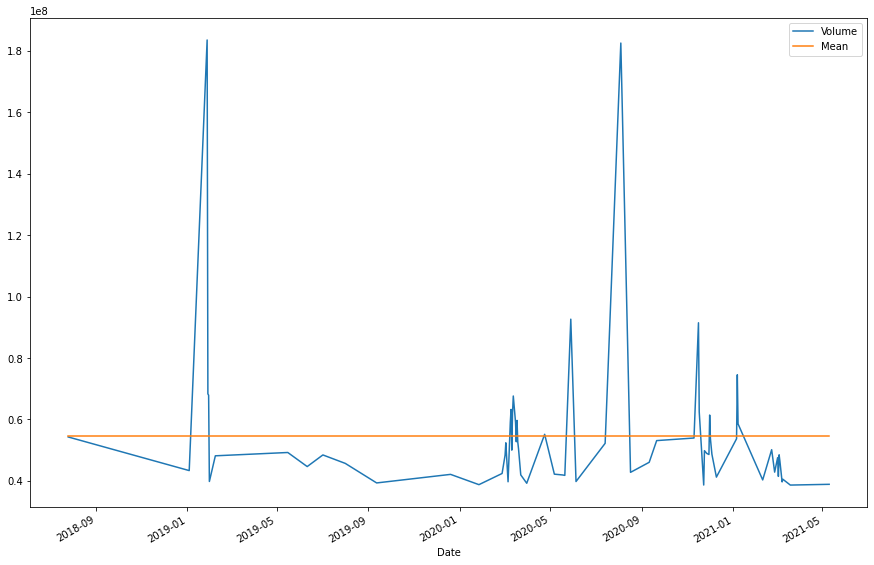

Momento 0, entre 28-01-2019 e 30-01-2019
Momento 1, entre 09-03-2020 e 18-03-2020
Momento 2, no dia 24-04-2020 
Momento 3, no dia 29-05-2020 
Momento 4, no dia 04-08-2020 
Momento 5, entre 16-11-2020 e 17-11-2020
Momento 6, no dia 01-12-2020 


In [13]:
volume_outlier_moments[['Volume','Mean']].plot(figsize=(15,10))
plt.show()
for i,m in enumerate(moments_list):
    if len(m) > 1:
        ini = m[0].strftime('%d-%m-%Y')
        end = m[len(m)-1].strftime('%d-%m-%Y')
        print('Momento {}, entre {} e {}'.format(i,ini,end))
    else:
        print('Momento {}, no dia {} '.format(i,m[0].strftime('%d-%m-%Y')))
    
    

In [12]:
# to be continue ...

In [96]:
for i,m in enumerate(moments_list):
    print('\n----------------------------------------------------------------------------------------------\n')
    searcher.clear()
    if len(m) > 1:
        ini_range = m[0].strftime('%m-%d-%Y')
        end_range = m[len(m)-1].strftime('%m-%d-%Y')
        print('Momento {}, entre {} e {}'.format(i,ini,end))
        search_engine=GoogleNews(lang='pt',start=ini_range,end=end_range)
        search_engine.search(contextual_ticket)
        print('Notícias encontradas: {}\nMostrando a página 1 abaixo:'.format(search_engine.total_count()))
        
    else:
        date_occurence = m[0].strftime('%m-%d-%Y')
        print('Momento {}, no dia {} '.format(i,date_occurence))
        search_engine=GoogleNews(lang='pt',start=date_occurence,end=date_occurence)
        search_engine.search(contextual_ticket)
        print('Notícias encontradas: {}\nMostrando a página 1 abaixo:'.format(search_engine.total_count()))
    news=pd.DataFrame(search_engine.result(sort=False))
   
    display(news[['datetime','media','title','desc']])
      


----------------------------------------------------------------------------------------------

Momento 0, entre 16-11-2020 e 17-11-2020
Notícias encontradas: 288
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2019-01-28,Money Times,Vale tem maior queda de valor de mercado da hi...,"A queda de 24,5% das ações da Vale (VALE3) nes..."
1,2019-01-28,InfoMoney,Opções de venda da Vale disparam até 20.800% c...,SÃO PAULO – Enquanto as ações da Vale (VALE3) ...
2,2019-01-28,UOL Economia,"Ação da Vale cai 24,5% após tragédia em MG e p...",As ações da mineradora Vale (VALE3) fecharam e...
3,2019-01-29,InfoMoney,Governo tem poder para mudar direção da Vale? ...,SÃO PAULO – Em meio a tragédia com o rompiment...
4,2019-01-28,,“Puts” da Vale saltam até 20.000% após desastr...,SÃO PAULO – Enquanto as ações da Vale (VALE3) ...
5,2019-01-28,,Rompimento de barragem da Vale pode ser o maio...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
6,2019-01-28,InfoMoney,ADRs da Vale despencam até 19% no pré-market d...,SÃO PAULO – As ações da Vale (VALE3) prometem ...
7,2019-01-29,InfoMoney,Turbulência na Vale pode fazer minério de ferr...,"SÃO PAULO – Na última segunda-feira (28), o de..."
8,2019-01-28,InfoMoney,Banco do Brasil pode ser o mais prejudicado do...,"Nesta segunda-feira (28), os ativos da Vale (V..."
9,2019-01-30,InfoMoney,"Título de inflação paga 4,56% ao ano nesta qua...","VALE3. R$ 112,49. -1,61% · ITUB4. R$ 28,37. +2..."



----------------------------------------------------------------------------------------------

Momento 1, entre 16-11-2020 e 17-11-2020
Notícias encontradas: 1380
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-03-10,Money Times,Ações de siderúrgicas avançam nesta terça; Val...,Vale VALE3 O minério de ferro na bolsa de comm...
1,2020-03-09,Eu Quero Investir,Vale (VALE3) diz que concluiu obras de contenç...,A Vale (VALE3) informou na manhã desta segunda...
2,2020-03-09,Money Times,Vale avalia possíveis impactos de rompimento d...,A mineradora Vale (VALE3) informou nesta segun...
3,2020-03-12,Money Times,Vale alerta que pode ter dificuldades operacio...,A mineradora Vale (VALE3) advertiu nesta quint...
4,2020-03-13,Investing.com,"IBOV, WINJ20, WDOJ20, PETR4, VALE3, BBAS3, LAM...","IBOV, WINJ20, WDOJ20, PETR4, VALE3, BBAS3, LAM..."
5,2020-03-11,Valor Investe,"Alta renda tem mais ações de empresas grandes,...","... são os mais presentes, enquanto entre dono..."
6,2020-03-09,,"Entenda o circuit breaker, mecanismo acionado ...","VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
7,2020-03-13,Money Times,Polaris vê conclusão de retirada de combustíve...,"... ferro da Vale (VALE3), deverá ser concluíd..."
8,2020-03-09,InfoMoney,"Receita já recebeu 2,46 milhões de declarações...","VALE3. R$ 112,49. -1,61% · ITUB4. R$ 28,37. +2..."
9,2020-03-17,InfoMoney,7 gestores que ganharam dinheiro no pior momen...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."



----------------------------------------------------------------------------------------------

Momento 2, no dia 04-24-2020 
Notícias encontradas: 769
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-04-24,InfoMoney,Ibovespa Futuro cai mais de 1% em meio à tensã...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
1,2020-04-24,InfoMoney,"Saída de Moro, Covid-19 e crise fiscal: ainda ...","VALE3. R$ 112,49. -1,61% · ITUB4. R$ 28,37. +2..."
2,2020-04-24,InfoMoney,Davos Financial Partnership vê “boas oportunid...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
3,2020-04-24,InfoMoney,Como o Brasil e o mundo estão repercutindo a s...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
4,2020-04-24,InfoMoney,Magazine Luiza dá início a processo gradual de...,"VALE3. R$ 112,42. +1,68% · ITUB4. R$ 28,67. -1..."
5,2020-04-24,InfoMoney,Equipe econômica do governo vê ‘Dilma 3’ no Pl...,"VALE3. R$ 112,42. +1,68% · ITUB4. R$ 28,67. -1..."
6,2020-04-24,InfoMoney,À espera de queda de 33% do PIB americano no 2...,"VALE3. R$ 112,97. +2,18% · ITUB4. R$ 28,65. -1..."
7,2020-04-24,E-Investidor,"Facebook lança Messengers Room, concorrente do...","... 17,40 +1,28% BBDC4 R$ 24,93 +0,16% IBOVESP..."
8,2020-04-24,E-Investidor,Abertura de Mercado: Bolsas operam em baixa ap...,"... R$ 28,93 +1,97% PETR4 R$ 25,75 +3,04% ABEV..."
9,2020-04-24,E-Investidor,Debêntures: o que são e como funcionam? – Educ...,"... R$ 28,85 +1,69% PETR4 R$ 26,16 +4,68% ABEV..."



----------------------------------------------------------------------------------------------

Momento 3, no dia 05-29-2020 
Notícias encontradas: 883
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-05-29,,"CSNA3, VALE3 e BRAP4 foram as mais valorizadas...","O indicador fundamentalista Preço/VPA, que rel..."
1,2020-05-29,Money Times,"Minério de ferro ruma US$ 100 a tonelada, util...","No mês passado, a Vale (VALE3) cortou o guidan..."
2,2020-05-29,InfoMoney,Ações de Vale e CSN saltam até 7% com China e ...,para preservar caixa; as ações terminaram o pr...
3,2020-05-29,InfoMoney,Ibovespa Futuro sobe apesar de coletiva de Tru...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
4,2020-05-29,InfoMoney,Ação da Via Varejo salta 35% e IRB cai 19%: as...,"VALE3. R$ 112,49. -1,61% · ITUB4. R$ 28,37. +2..."
5,2020-05-29,InfoMoney,Ibovespa tem melhor maio desde 2009 com maior ...,"VALE3. R$ 112,70. +1,94% · ITUB4. R$ 28,66. -1..."
6,2020-05-29,Money Times,O que comprar em junho? XP revela nova carteir...,"Iguatemi · IGTA3, 47. EzTec · EZTC3, 44,2. Loj..."
7,2020-05-29,E-Investidor,Carteira TOP 10: PETR4 e KLBN11 no lugar de RA...,"... R$ 28,85 +1,69% PETR4 R$ 26,16 +4,68% ABEV..."
8,2020-05-29,InfoMoney,PIB do primeiro trimestre: uma queda expressiv...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
9,2020-05-29,InfoMoney,CEO e CFO da Renner explicam resultados do tri...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."



----------------------------------------------------------------------------------------------

Momento 4, no dia 08-04-2020 
Notícias encontradas: 1110
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-08-04,InfoMoney,BNDES faz desinvestimento bilionário na Vale e...,SÃO PAULO – As ações da mineradora Vale (VALE3...
1,2020-08-04,E-Investidor,"Por que Vale (VALE3), MRV (MRVE3) e Hypera (HY...","Por que Vale (VALE3), MRV (MRVE3) e Hypera (HY..."
2,2020-08-04,Seu Dinheiro,Ibovespa tem queda acentuada com bancos e pand...,O leilão estendido das ações ON da Vale (VALE3...
3,2020-08-04,InfoMoney,Ibovespa Futuro cai em meio a expectativas por...,"VALE3. R$ 116,67. -1,73% · ITUB4. R$ 27,71. -0..."
4,2020-08-04,InfoMoney,As ações mais recomendadas pelos analistas par...,"Vale (VALE3). Assim como em julho, os papéis d..."
5,2020-08-04,Money Times,"Apostando na recuperação, Mirae escala B3 para...","B3 · B3SA3, 10. Magazine Luiza · MGLU3, 10. MR..."
6,2020-08-04,InfoMoney,Lucro Líquido da Alpargatas no 2º trimestre é ...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
7,2020-08-04,InfoMoney,"Com parques fechados na pandemia, Disney perde...","DÓLAR. R$ 5,27. -0,77% · BITCOIN. R$ 266.246. ..."
8,2020-08-04,InfoMoney,Onix perde o posto de veículo mais vendido do ...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
9,2020-08-04,InfoMoney,"Produção industrial cresce 8,9% em junho, acim...","VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."



----------------------------------------------------------------------------------------------

Momento 5, entre 16-11-2020 e 17-11-2020
Notícias encontradas: 3590
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-11-17,Money Times,BNDESPar informa venda de 40 milhões de ações ...,... a venda de 40 milhões de ações ordinárias ...
1,2020-11-17,Money Times,Vale diz que negociação para acordo sobre Brum...,A mineradora Vale (VALE3) informou nesta terça...
2,2020-11-17,InfoMoney,Ações da Linx sobem 3% após Stone elevar propo...,"... em meio ao maior fluxo estrangeiro, com de..."
3,2020-11-16,InfoMoney,Ações de aéreas disparam e bancos sobem até 7%...,"Também no radar dos mercados, o BNDES vendeu 4..."
4,2020-11-16,Exame Invest,Vale bate recorde histórico na Bolsa em dia de...,"O BNDESPar, braço de investimentos em particip..."
5,2020-11-16,InfoMoney,Ibovespa Futuro sobe com efetividade de vacina...,"VALE3. R$ 112,49. -1,61% · ITUB4. R$ 28,37. +2..."
6,2020-11-16,Money Times,B3 e Klabin são as ações mais indicadas para i...,Os ativos desbancaram as ações da Vale (VALE3)...
7,2020-11-16,Eu Quero Investir,Petrobras (PETR3 PETR4): ações sobem com alta ...,"Enquanto isso, a ação da Vale (VALE3) tem alta..."
8,2020-11-16,InfoMoney,Petrobras eleva oferta de diesel com baixo teo...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
9,2020-11-17,InfoMoney,Maior parte das gestoras não coleta dados sobr...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."



----------------------------------------------------------------------------------------------

Momento 6, no dia 12-01-2020 
Notícias encontradas: 2260
Mostrando a página 1 abaixo:


,datetime,media,title,desc
0,2020-12-01,InfoMoney,"Otimismo, choque, incerteza e esperança: o grá...","VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
1,2020-12-01,InfoMoney,"Ações da Vale saltam 4%, Petrobras sobe 3% ape...","Os papéis da Vale (VALE3, R$ 81,25, +4,17%) su..."
2,2020-12-01,InfoMoney,B3 divulga 1ª prévia da nova carteira do Ibove...,Dentro os papéis com maior peso no índice segu...
3,2020-12-01,Money Times,Guide renova maior parte da carteira recomenda...,A carteira encerrou novembro com valorização d...
4,2020-12-01,E-Investidor,Fechamento de mercado: Dezembro começa com tom...,"... R$ 28,31 +2,68% PETR4 R$ 24,97 +0,77% ABEV..."
5,2020-12-01,InfoMoney,Opep+ adia negociações com maior divisão entre...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
6,2020-12-01,Money Times,Elite indica 10 ações em sua carteira recomend...,"... Renner (LREN3), Magazine Luiza (MGLU3), Na..."
7,2020-12-01,InfoMoney,Petrobras pode entregar retorno sobre dividend...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
8,2020-12-01,InfoMoney,Ministério da Saúde concluirá plano de vacinaç...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."
9,2020-12-01,InfoMoney,Percentual de famílias endividadas cai em nove...,"VALE3. R$ 110,56. -1,72% · ITUB4. R$ 29,00. +2..."


---------------------------------------------------------------------------

#### Here we finish our first example usage of this few tools